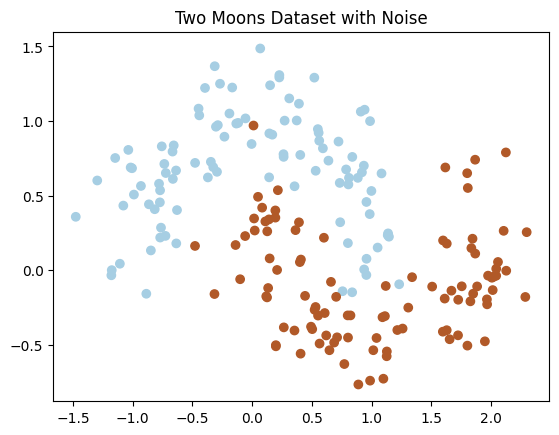

In [1]:
import sys, os, importlib
sys.path.insert(0, os.path.abspath(".."))

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

from src.qkernel_utils import (
    make_device, make_kernel_element, make_cached_kernel_element,
    quantum_kernel_matrix, to_angles, feature_map
)

# Create a noisy two moons dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Visualise
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Two Moons Dataset with Noise")
plt.show()


In [2]:
# Train/test split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardise
sc = StandardScaler().fit(Xtr)
Xtr_std, Xte_std = sc.transform(Xtr), sc.transform(Xte)

# Classical SVM
clf_classical = SVC(kernel="rbf", C=1.0, gamma="scale")
clf_classical.fit(Xtr_std, ytr)
acc_classical = accuracy_score(yte, clf_classical.predict(Xte_std))
print(f"Classical RBF-SVM accuracy: {acc_classical*100:.2f}%")


Classical RBF-SVM accuracy: 92.50%


In [3]:
# Create quantum kernel element function
dev = make_device(wires=2)
k_elem = make_cached_kernel_element(dev, feature_map)

# Map standardised features to angles in [-pi, pi]
Xtr_ang = to_angles(Xtr_std)
Xte_ang = to_angles(Xte_std)

# Build kernel matrices
K_train = quantum_kernel_matrix(Xtr_ang, Xtr_ang, k_elem)
K_test  = quantum_kernel_matrix(Xte_ang, Xtr_ang, k_elem)

In [4]:
clf_quantum = SVC(kernel="precomputed")
clf_quantum.fit(K_train, ytr)
acc_quantum = accuracy_score(yte, clf_quantum.predict(K_test))
print(f"Quantum kernel SVM accuracy: {acc_quantum*100:.2f}%")

Quantum kernel SVM accuracy: 77.50%
